<a href="https://colab.research.google.com/github/sol-commits/apartment_transaction_price_analysis/blob/main/seoul_day_care_center_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

# Data

In [ ]:
CITY = '서울특별시'

In [ ]:
DATA_PATH = '/content/drive/MyDrive/my_ws/edu/data_analysis/apartment_transaction_price_analysis/data'

In [ ]:
day_care_center_df = pd.read_csv(f'{DATA_PATH}/{CITY}/day_care_center_df.csv')

In [ ]:
park_df = pd.read_csv(f'{DATA_PATH}/{CITY}/park_df.csv')

In [ ]:
apt_df = pd.read_csv(f'{DATA_PATH}/{CITY}/apartments_df.csv')

# Functions

In [ ]:
def draw_heatmap_for_corr(df, title):
  sns.heatmap(df, annot=True)
  plt.title(f'Correlation Heatmap: {title}', fontsize=15, fontweight='bold')
  plt.show()

# Code

## 결측치 확인

In [ ]:
day_care_center_df

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31
...,...,...,...,...,...,...,...,...,...,...,...
5651,서울특별시,강남구,현이어린이집,가정,20,NaN,NaN,NaN,NaN,NaN,2019-03-05
5652,서울특별시,강남구,현지아한솔어린이집,민간,37,NaN,NaN,NaN,NaN,NaN,2019-03-05
5653,서울특별시,강남구,호야 어린이집,가정,19,NaN,NaN,NaN,NaN,NaN,2019-03-05
5654,서울특별시,강남구,힐스어린이집,국공립,92,NaN,NaN,NaN,NaN,NaN,2019-03-05


In [ ]:
day_care_center_df[day_care_center_df.isna().any(axis=1)]

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
154,서울특별시,도봉구,꼬마숲둥지어린이집,민간,49,10.0,4.0,NaN,8.0,Y,2018-05-01
155,서울특별시,도봉구,방학가람어린이집,국공립,88,12.0,6.0,NaN,9.0,N,2018-05-01
157,서울특별시,도봉구,서원어린이집,국공립,47,9.0,3.0,NaN,4.0,N,2018-05-01
158,서울특별시,도봉구,노아어린이집,민간,33,10.0,4.0,NaN,6.0,N,2018-05-01
159,서울특별시,도봉구,고은햇살어린이집,가정,14,5.0,4.0,NaN,4.0,N,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...
5651,서울특별시,강남구,현이어린이집,가정,20,NaN,NaN,NaN,NaN,NaN,2019-03-05
5652,서울특별시,강남구,현지아한솔어린이집,민간,37,NaN,NaN,NaN,NaN,NaN,2019-03-05
5653,서울특별시,강남구,호야 어린이집,가정,19,NaN,NaN,NaN,NaN,NaN,2019-03-05
5654,서울특별시,강남구,힐스어린이집,국공립,92,NaN,NaN,NaN,NaN,NaN,2019-03-05


- 결측치가 꽤 많아보임
- `*_num` 컬럼들로 상관관계를 분석할 것이기 때문에 결측치를 채워주기로 결정

## KNN 알고리즘으로 결측치 채워넣기

In [ ]:
model = KNNImputer(n_neighbors=10)
model

KNNImputer(n_neighbors=10)

In [ ]:
numeric_columns = [column for column in day_care_center_df.columns if "num" in column]

In [ ]:
day_care_center_df_filled_nan = model.fit_transform(day_care_center_df[numeric_columns])
day_care_center_df_filled = pd.DataFrame(day_care_center_df_filled_nan, columns=numeric_columns)
day_care_center_df_filled

,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
0,70.0,11.0,5.0,1.0,7.0
1,88.0,22.0,5.0,2.0,10.0
2,90.0,23.0,6.0,1.0,32.0
3,18.0,5.0,3.0,0.0,4.0
4,93.0,20.0,7.0,2.0,10.0
...,...,...,...,...,...
5651,20.0,5.0,3.6,0.2,3.8
5652,37.0,8.4,4.0,0.1,4.2
5653,19.0,5.7,3.3,0.2,4.1
5654,92.0,14.9,7.0,0.8,10.5


In [ ]:
day_care_center_df[numeric_columns] = day_care_center_df_filled
display(day_care_center_df.head())
len(day_care_center_df)

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70.0,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88.0,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90.0,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18.0,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93.0,20.0,7.0,2.0,10.0,N,2018-07-31


5656

In [ ]:
day_care_center_df[day_care_center_df[numeric_columns].isna().any(axis=1)]

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date


## 아파트 정보에서 동, 면적, 실거래가,  거래가/m2 컬럼만 추출

In [ ]:
len(apt_df)

742285

In [ ]:
apt_df_filtered = apt_df[['dong', 'exclusive_use_area', 'transaction_real_price']]
apt_df_filtered['real_price_per_m2'] = apt_df_filtered['transaction_real_price'] / apt_df_filtered['exclusive_use_area']
display(apt_df_filtered.head(1))
len(apt_df_filtered)

<ipython-input-60-01d065db6723>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apt_df_filtered['real_price_per_m2'] = apt_df_filtered['transaction_real_price'] / apt_df_filtered['exclusive_use_area']


,dong,exclusive_use_area,transaction_real_price,real_price_per_m2
0,신교동,84.82,37500,442.112709


742285

## 집값 데이터에 구 정보 추가

apt_df_filtered는 동정보를 가지고 있고 <br>
day_care_center_df는 구정보를 가지고 있어서 <br>
둘을 merge하려면 park data의 이용이 필요

In [ ]:
display(apt_df_filtered.info())
display(day_care_center_df.info())
display(park_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742285 entries, 0 to 742284
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dong                    742285 non-null  object 
 1   exclusive_use_area      742285 non-null  float64
 2   transaction_real_price  742285 non-null  int64  
 3   real_price_per_m2       742285 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 22.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  5656 non-null   object 
 1   gu                    5656 non-null   object 
 2   day_care_name         5656 non-null   object 
 3   day_care_type         5656 non-null   object 
 4   day_care_baby_num     5656 non-null   float64
 5   teacher_num           5656 non-null   float64
 6   nursing_room_num      5656 non-null   float64
 7   playground_num        5656 non-null   float64
 8   CCTV_num              5656 non-null   float64
 9   is_commuting_vehicle  5161 non-null   object 
 10  reference_date        5656 non-null   object 
dtypes: float64(5), object(6)
memory usage: 486.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         930 non-null    object 
 1   gu                           930 non-null    object 
 2   dong                         930 non-null    object 
 3   park_name                    930 non-null    object 
 4   park_type                    930 non-null    object 
 5   park_area                    930 non-null    float64
 6   park_exercise_facility       152 non-null    object 
 7   park_entertainment_facility  250 non-null    object 
 8   park_benefit_facility        160 non-null    object 
 9   park_cultural_facitiy        54 non-null     object 
 10  park_facility_other          59 non-null     object 
 11  park_open_year               510 non-null    float64
 12  reference_date               930 non-null    object 
dtypes: float64(2), objec

None

### 공원 데이터에서 `구`, `동` 데이터 추출

In [ ]:
park_gu_dong_unique = park_df[['gu', 'dong']].drop_duplicates().reset_index(drop=True)
len(park_gu_dong_unique)

166

In [ ]:
len(apt_df_filtered)

742285

In [ ]:
gu_dong_apt_df = pd.merge(park_gu_dong_unique, apt_df_filtered, on='dong')
display(gu_dong_apt_df.head())
len(gu_dong_apt_df)

,gu,dong,exclusive_use_area,transaction_real_price,real_price_per_m2
0,서초구,반포동,84.96,88000,1035.781544
1,서초구,반포동,56.90,44000,773.286467
2,서초구,반포동,72.51,101000,1392.911323
3,서초구,반포동,96.60,75000,776.397516
4,서초구,반포동,96.60,75000,776.397516


538019

## 구별 집값 평균과 유치원 데이터의 상관관계

### 구별 집값 평균 계산

In [ ]:
mean_avg_housing_for_gu = gu_dong_apt_df.groupby('gu').mean(numeric_only=True).reset_index()
display(mean_avg_housing_for_gu.head())
len(mean_avg_housing_for_gu)

,gu,exclusive_use_area,transaction_real_price,real_price_per_m2
0,강남구,83.621196,91294.684645,1106.950585
1,강동구,75.143940,48966.691053,680.267379
2,강북구,75.891503,33692.467160,449.835857
3,강서구,72.751637,36881.131409,511.707947
4,관악구,79.405997,50608.137394,611.033893


23

### 상관계수 계산

In [ ]:
pd.merge(mean_avg_housing_for_gu, day_care_center_df)

,gu,exclusive_use_area,transaction_real_price,real_price_per_m2,city,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,강남구,83.621196,91294.684645,1106.950585,서울특별시,GKL행복(강남 코엑스2호점)어린이집,직장,49.0,15.0,5.1,0.2,6.7,NaN,2019-03-05
1,강남구,83.621196,91294.684645,1106.950585,서울특별시,GKL행복어린이집,직장,60.0,10.8,5.1,0.8,8.6,NaN,2019-03-05
2,강남구,83.621196,91294.684645,1106.950585,서울특별시,GS리테일 푸르니 어린이집,직장,61.0,11.6,5.1,0.7,8.1,NaN,2019-03-05
3,강남구,83.621196,91294.684645,1106.950585,서울특별시,IBK 참 좋은 어린이집,직장,49.0,15.0,5.1,0.2,6.7,NaN,2019-03-05
4,강남구,83.621196,91294.684645,1106.950585,서울특별시,LH서울어린이집,직장,34.0,8.6,4.0,0.1,6.6,NaN,2019-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,중랑구,71.169634,30092.582893,429.441793,서울특별시,혜란어린이집,민간,55.0,13.0,7.0,0.0,13.0,Y,2018-10-08
5652,중랑구,71.169634,30092.582893,429.441793,서울특별시,혜성어린이집,국공립,110.0,16.0,5.0,0.0,9.0,N,2018-10-08
5653,중랑구,71.169634,30092.582893,429.441793,서울특별시,혜원어린이집,민간,51.0,15.0,7.0,0.0,8.0,Y,2018-10-08
5654,중랑구,71.169634,30092.582893,429.441793,서울특별시,화랑어린이집,국공립,40.0,10.0,3.0,0.0,13.0,N,2018-10-08


In [ ]:
pd.merge(mean_avg_housing_for_gu, day_care_center_df).corr(numeric_only=True)

,exclusive_use_area,transaction_real_price,real_price_per_m2,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
exclusive_use_area,1.000000,0.809394,0.693227,0.117074,0.140308,0.134177,0.091022,0.151535
transaction_real_price,0.809394,1.000000,0.978996,0.074867,0.101354,0.068209,0.090404,0.077545
real_price_per_m2,0.693227,0.978996,1.000000,0.060253,0.083800,0.048764,0.080906,0.055037
day_care_baby_num,0.117074,0.074867,0.060253,1.000000,0.802455,0.867994,0.630527,0.820591
teacher_num,0.140308,0.101354,0.083800,0.802455,1.000000,0.719059,0.511009,0.694323
nursing_room_num,0.134177,0.068209,0.048764,0.867994,0.719059,1.000000,0.540390,0.781595
playground_num,0.091022,0.090404,0.080906,0.630527,0.511009,0.540390,1.000000,0.549014
CCTV_num,0.151535,0.077545,0.055037,0.820591,0.694323,0.781595,0.549014,1.000000


### heatmap

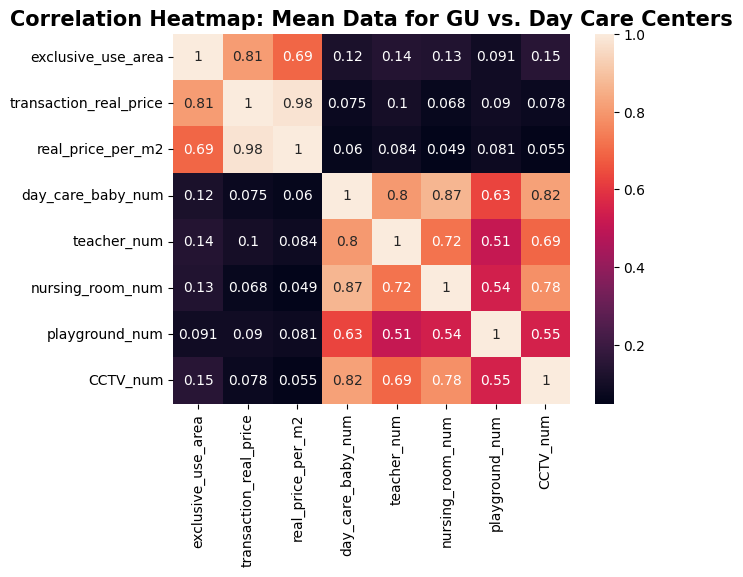

In [ ]:
draw_heatmap_for_corr(
    pd.merge(mean_avg_housing_for_gu, day_care_center_df).corr(numeric_only=True),
    'Mean Data for GU vs. Day Care Centers')

## 구별 집값 평균과 구별 유치원 데이터의 합의 상관관계

### 상관계수 계산

In [ ]:
day_care_center_df_sum_by_gu = day_care_center_df.groupby('gu').sum(numeric_only=True).reset_index()
day_care_center_df_sum_by_gu

,gu,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
0,강남구,11605.0,2304.3,1106.3,104.7,1717.1
1,강동구,13278.0,2690.0,1291.4,112.4,2051.6
2,강북구,8569.0,1674.0,815.0,73.3,1276.4
3,강서구,35150.0,7032.0,3822.8,276.8,5620.4
4,관악구,11543.0,2463.0,1207.0,196.0,1912.0
5,광진구,8778.0,1865.0,892.0,64.8,1133.0
6,구로구,13466.0,2797.0,1792.0,107.0,2217.7
7,금천구,8051.0,1663.0,772.0,33.0,1246.0
8,노원구,13711.0,3251.8,1576.0,107.0,2301.6
9,도봉구,10319.0,2089.0,1031.0,92.5,1337.2


### heatmap

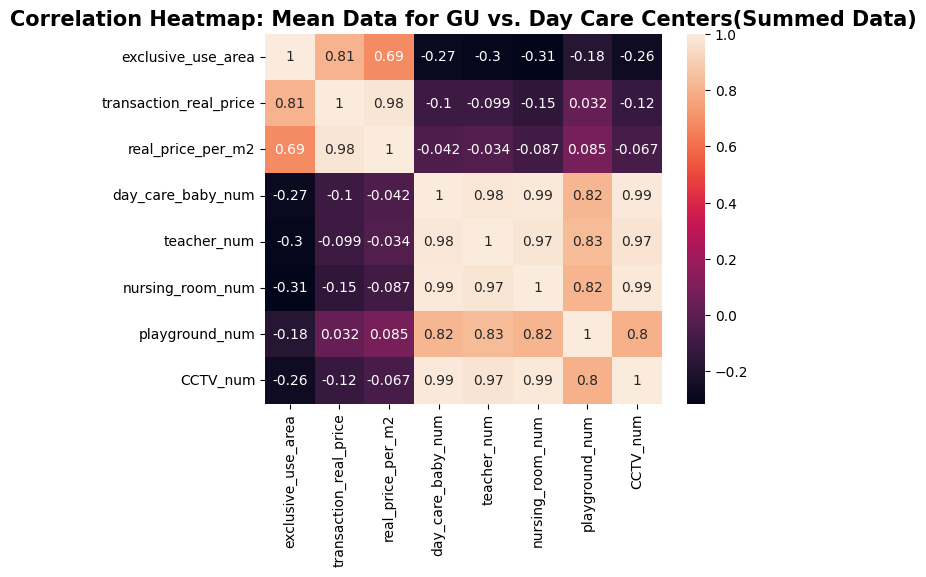

In [ ]:
draw_heatmap_for_corr(
    pd.merge(mean_avg_housing_for_gu, day_care_center_df_sum_by_gu).corr(numeric_only=True),
    'Mean Data for GU vs. Day Care Centers(Summed Data)'
)